In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
electricity_production = pd.read_csv(r"C:\Users\Tyler\Downloads\Electricity_Production_By_Source.csv")
electricity_production.head()

,Entity,Code,Year,Electricity from coal (TWh),Electricity from gas (TWh),Electricity from hydro (TWh),Electricity from other renewables (TWh),Electricity from solar (TWh),Electricity from oil (TWh),Electricity from wind (TWh),Electricity from nuclear (TWh)
0,Afghanistan,AFG,2000,0.0,0.155,0.312,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,2001,0.0,0.094,0.498,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,AFG,2002,0.0,0.132,0.555,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,AFG,2003,0.0,0.309,0.630,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,AFG,2004,0.0,0.329,0.565,0.0,0.0,0.0,0.0,0.0


In [3]:
# electricity_production.info()
electricity_production['Year'].astype('int')
electricity_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6241 entries, 0 to 6240
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Entity                                   6241 non-null   object 
 1   Code                                     5474 non-null   object 
 2   Year                                     6241 non-null   int64  
 3   Electricity from coal (TWh)              5221 non-null   float64
 4   Electricity from gas (TWh)               5221 non-null   float64
 5   Electricity from hydro (TWh)             6241 non-null   float64
 6   Electricity from other renewables (TWh)  6206 non-null   float64
 7   Electricity from solar (TWh)             6241 non-null   float64
 8   Electricity from oil (TWh)               5221 non-null   float64
 9   Electricity from wind (TWh)              6241 non-null   float64
 10  Electricity from nuclear (TWh)           6241 no

In [4]:
def filling_missing(df, column):
    mean = df[column].mean()
    std = df[column].std()
    minimum_value = 0
    missing_values = df[column].isna().sum()
    rng = np.random.default_rng()
    random_values = rng.integers(low = minimum_value, high = mean + std, size = missing_values)
    df.loc[df[column].isna(), column] = random_values

filling_missing(electricity_production, 'Electricity from coal (TWh)')
filling_missing(electricity_production, 'Electricity from gas (TWh)')
filling_missing(electricity_production, 'Electricity from other renewables (TWh)')
filling_missing(electricity_production, 'Electricity from oil (TWh)')
electricity_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6241 entries, 0 to 6240
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Entity                                   6241 non-null   object 
 1   Code                                     5474 non-null   object 
 2   Year                                     6241 non-null   int64  
 3   Electricity from coal (TWh)              6241 non-null   float64
 4   Electricity from gas (TWh)               6241 non-null   float64
 5   Electricity from hydro (TWh)             6241 non-null   float64
 6   Electricity from other renewables (TWh)  6241 non-null   float64
 7   Electricity from solar (TWh)             6241 non-null   float64
 8   Electricity from oil (TWh)               6241 non-null   float64
 9   Electricity from wind (TWh)              6241 non-null   float64
 10  Electricity from nuclear (TWh)           6241 no

In [5]:
electricity_value = electricity_production.iloc[:, 3:]
electricity_production['Total electricity produced'] = electricity_value.sum(axis=1)
electricity_production.head()

,Entity,Code,Year,Electricity from coal (TWh),Electricity from gas (TWh),Electricity from hydro (TWh),Electricity from other renewables (TWh),Electricity from solar (TWh),Electricity from oil (TWh),Electricity from wind (TWh),Electricity from nuclear (TWh),Total electricity produced
0,Afghanistan,AFG,2000,0.0,0.155,0.312,0.0,0.0,0.0,0.0,0.0,0.467
1,Afghanistan,AFG,2001,0.0,0.094,0.498,0.0,0.0,0.0,0.0,0.0,0.592
2,Afghanistan,AFG,2002,0.0,0.132,0.555,0.0,0.0,0.0,0.0,0.0,0.687
3,Afghanistan,AFG,2003,0.0,0.309,0.630,0.0,0.0,0.0,0.0,0.0,0.939
4,Afghanistan,AFG,2004,0.0,0.329,0.565,0.0,0.0,0.0,0.0,0.0,0.894


In [6]:
oldest_year = electricity_production['Year'].min()
entity_back_to_1985 = electricity_production[electricity_production['Year'] == oldest_year]
countries_back_to_1985 = electricity_production[electricity_production['Entity'].isin(entity_back_to_1985['Entity'])]
countries_back_to_1985.reset_index(drop=True, inplace=True)
world_electricity_produced = electricity_production[electricity_production['Entity']=='World']

renew = [world_electricity_produced['Electricity from hydro (TWh)'],
 world_electricity_produced['Electricity from solar (TWh)'],
 world_electricity_produced['Electricity from wind (TWh)'], 
 world_electricity_produced['Electricity from other renewables (TWh)']]

world_electricity_produced['Total electricity by renewables'] = sum(renew)


<ipython-input-6-280246269df2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_electricity_produced['Total electricity by renewables'] = sum(renew)


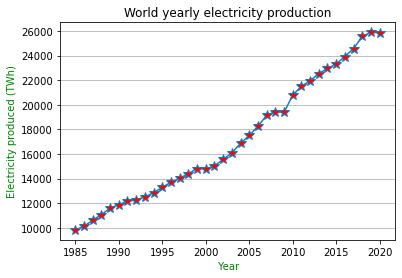

In [7]:
countries_back_to_1985 = countries_back_to_1985[countries_back_to_1985['Entity'] != 'World']

plt.plot(world_electricity_produced['Year'], world_electricity_produced['Total electricity produced'], marker='*',
        mfc = 'r', ms=10)
plt.grid(axis='y')
plt.title('World yearly electricity production')
plt.xlabel(' Year', c='g')
plt.ylabel('Electricity produced (TWh)', c='g')
plt.show()

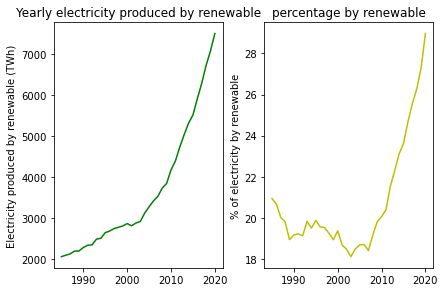

In [8]:
perc_world = 100*(world_electricity_produced['Total electricity by renewables'] / world_electricity_produced['Total electricity produced'])

fig, axs = plt.subplots(1, 2)
fig.tight_layout()
axs[0].plot(world_electricity_produced['Year'], world_electricity_produced['Total electricity by renewables'], c='g')
# axs[0].set_xticklabels(world_electricity_produced['Year'], rotation=90)
axs[0].set_title('Yearly electricity produced by renewable')
axs[0].set_ylabel('Electricity produced by renewable (TWh)')

axs[1].plot(world_electricity_produced['Year'], perc_world, c='y')
axs[1].set_title('percentage by renewable')
axs[1].set_ylabel('% of electricity by renewable')
plt.show()

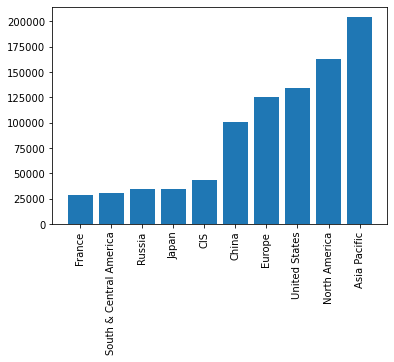

In [10]:
top_10_entity = countries_back_to_1985.groupby('Entity')['Total electricity produced'].sum().nlargest(10).sort_values()

plt.bar(top_10_entity.index, top_10_entity)
plt.xticks(rotation=90)
plt.show()

<ipython-input-11-0b2f07a9e468>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(sorted_electricity_asia.index, rotation=90)
<ipython-input-11-0b2f07a9e468>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(sorted_electricity_NA.index, rotation=90)


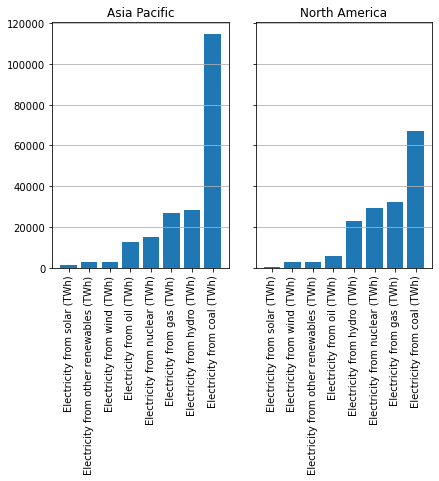

In [11]:
asia_pacific = countries_back_to_1985[countries_back_to_1985['Entity']=='Asia Pacific'].sum(axis=0)
# print(asia_pacific)
sorted_electricity_asia = asia_pacific[3:11].sort_values()
North_America = countries_back_to_1985[countries_back_to_1985['Entity']=='North America'].sum(axis=0)
sorted_electricity_NA = North_America[3:11].sort_values()


fig, axs = plt.subplots(1, 2, sharey=True)
fig.tight_layout()
axs[0].bar(sorted_electricity_asia.index, sorted_electricity_asia)
axs[1].bar(sorted_electricity_NA.index, sorted_electricity_NA)

# axs[0].xticks(rotation=90)
axs[0].set_title('Asia Pacific')
axs[0].set_xticklabels(sorted_electricity_asia.index, rotation=90)
axs[1].set_title('North America')
axs[1].set_xticklabels(sorted_electricity_NA.index, rotation=90)
axs[0].grid(axis='y')
axs[1].grid(axis='y')
plt.show()

In [12]:
reliance_on_coal_AP = 100 *(sorted_electricity_asia[-1] / asia_pacific[-1])
reliance_on_coal_NA = 100 *(sorted_electricity_NA[-1] / North_America[-1])
print(reliance_on_coal_AP,reliance_on_coal_NA)

56.157262839310526 41.1170089340513
